<a href="https://colab.research.google.com/github/Trantracy/Movie-review-with-Logistic-Regression/blob/master/Movie_review_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The moview review Sentiment Analysis :
 

**STEP 1:** Overview the data

**STEP 2:** Cleaning data


1.   Lemmatization
2.   Stop word
3.   Cleanining data
4.   TF-IDF

**STEP 3:** Classification by Logistic Regression



In [0]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
# Mounted to Google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import the dataset
data = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Data/movie_review.csv', encoding='utf-8', sep='\t')

In [0]:
# checkout data set. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         22500 non-null  object
 1   review     22500 non-null  object
 2   sentiment  22500 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 527.5+ KB


In [0]:
# Check missing data
data.isnull().sum()

id           0
review       0
sentiment    0
dtype: int64

In [0]:
# overview 10 random rows
data.sample(10)

,id,review,sentiment
10493,9065_10,"Watching the commercials for this movie, I was...",1
6476,3372_9,Its time to pay tribute to the great Charton H...,1
2943,1609_3,"The first part, Che in Cuba, is about that por...",0
8764,6008_7,When I saw the film for the first time in the ...,1
14951,3874_3,"This film was so predictable, that during the ...",0
9190,933_2,"Undeveloped/unbelievable story line,(by the ti...",0
12031,9165_10,This has to be the best adaptation I have seen...,1
18232,9234_4,"Remade today, this film would be a very creepy...",0
20307,6251_1,I was able to hang in for only the first twent...,0
2684,870_10,"\Read My Lips (Sur mes lÃ¨vres)\"" (which proba...",1


In [0]:
# get a random  review
data.iloc[3000]['review']

'No wonder this movie never saw the light of day. The timing was of the release was awful. The Gong Show had already \\jumped the shark\\" by the time the movie came out, so who would pay money just to see a few of the censored clips from the original run of the show? And the show clips are just a tiny bit of this pathetic, 90-minute whine by Chuck Barris about how hard his life was as host of the show. Did he really expect we would feel sorry for him and his messed-up millionaire life? Did he really think we even wanted to KNOW about his life? (Obviously so, since he later wrote his weird autobiography about his career as a CIA operative.) Did he think the gag of having everyone, everywhere audition for him would stay fresh for 90 minutes? Or the network executive hounding him at every turn? This might have worked as the plot for a 30-minute sitcom episode, but not as a full-length movie. However, it was nice to see Rip Taylor, Gene Gene, and the Unknown Comic again (although, to make

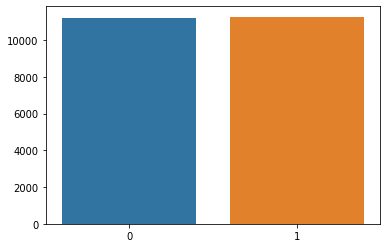

In [38]:
# Check the balance of labels
label = data['sentiment'].value_counts()
sns.barplot(x =label.index ,y = label.values)
plt.show()
# the dataset is highly balanced


## Cleaning data

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
    text = re.sub('<[^>]*>', '', text)
    # Save emoticons to append later
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons. Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

tfidf = TfidfVectorizer(stop_words='english',
                        tokenizer=tokenizer_porter,
                        preprocessor=preprocessor)

## TF- IDF and Classification

In [0]:
# Split the dataset: training and test set
from sklearn.model_selection import train_test_split
X = data['review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 6)

In [0]:
# Connect LogisticRegression and TfidfVectorizer by Pineline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
clf = Pipeline([('vect', tfidf),
                ('clf', LogisticRegression(random_state=0))])

clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_wor

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessor at 0x7f2f7a676378>,
                                 smooth_idf=True, stop_words='english',
                                 strip_accents=N...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenizer_porter at 0x7f2f7a676510>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
            

In [0]:
# Check accuracy, precision,recall
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2242
           1       0.88      0.90      0.89      2258

    accuracy                           0.89      4500
   macro avg       0.89      0.89      0.89      4500
weighted avg       0.89      0.89      0.89      4500



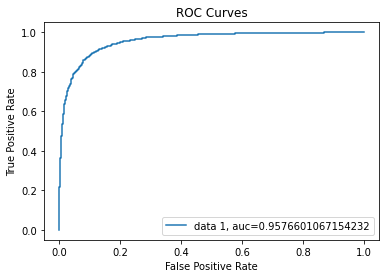

In [0]:
# Sentiment_model evaluation by ROC Curves
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import metrics

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curves')
plt.show()


### Add the prediction to the DataFrame

In [0]:
prediction = clf.predict(data['review'])
data['prediction'] = prediction

In [0]:
# Original data and prediction
data

,id,review,sentiment,prediction
0,5814_8,With all this stuff going down at the moment w...,1,1
1,2381_9,"\The Classic War of the Worlds\"" by Timothy Hi...",1,1
2,7759_3,The film starts with a manager (Nicholas Bell)...,0,0
3,3630_4,It must be assumed that those who praised this...,0,0
4,9495_8,Superbly trashy and wondrously unpretentious 8...,1,0
...,...,...,...,...
22495,3453_3,It seems like more consideration has gone into...,0,0
22496,5064_1,I don't believe they made this film. Completel...,0,0
22497,10905_3,"Guy is a loser. Can't get girls, needs to buil...",0,0
22498,10194_3,This 30 minute documentary BuÃ±uel made in the...,0,0


## Test setset

In [0]:
# Import the dataset
test = pd.read_csv('/content/drive/My Drive/FTMLE - Tonga/Data/movie_review_evaluation.csv', encoding='utf-8', sep='\t')

In [0]:
# overview test set
test


,id,review
0,10633_1,I watched this video at a friend's house. I'm ...
1,4489_1,`The Matrix' was an exciting summer blockbuste...
2,3304_10,This movie is one among the very few Indian mo...
3,3350_3,The script for this movie was probably found i...
4,1119_1,Even if this film was allegedly a joke in resp...
...,...,...
2495,1065_10,"Dark Angel is a futuristic sci-fi series, set ..."
2496,7261_3,This British-Spanish co-production is one of t...
2497,11075_10,"Having read the reviews for this film, I under..."
2498,2041_2,Well I'll start with the good points. The movi...


In [0]:
# prediction on test set
prediction2 = clf.predict(test['review'])

In [0]:
# Add prediction on to the original data
test['prediction'] = prediction2

In [0]:
# overview test set with prediction
test

,id,review,prediction
0,10633_1,I watched this video at a friend's house. I'm ...,0
1,4489_1,`The Matrix' was an exciting summer blockbuste...,0
2,3304_10,This movie is one among the very few Indian mo...,1
3,3350_3,The script for this movie was probably found i...,0
4,1119_1,Even if this film was allegedly a joke in resp...,0
...,...,...,...
2495,1065_10,"Dark Angel is a futuristic sci-fi series, set ...",1
2496,7261_3,This British-Spanish co-production is one of t...,0
2497,11075_10,"Having read the reviews for this film, I under...",1
2498,2041_2,Well I'll start with the good points. The movi...,0


In [0]:
#save to the csv file
test.to_csv(r'Tran.csv',index=False,encoding='utf-8')

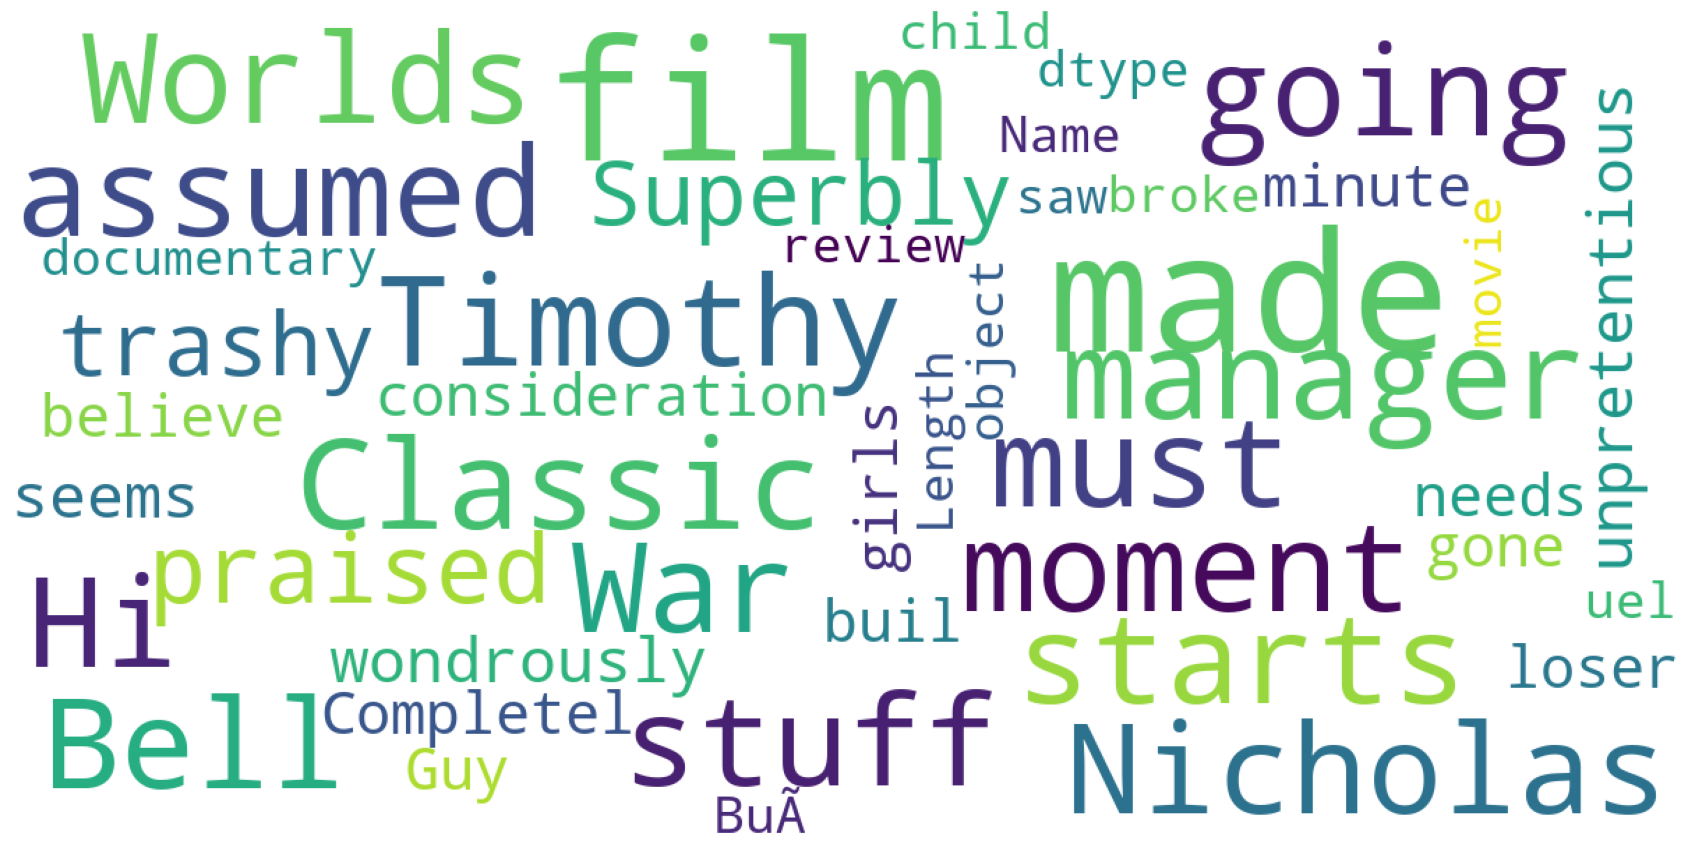

In [47]:
# wordcloud function for fun

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (30, 30))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data["review"])